# Dados de estrutura organizacional da APF

O SIORG é o sistema estruturante que contém toda a estrutura dos órgãos e entidades da Administração Pública Federal (APF).

In [37]:
import random

import pandas as pd
import requests
from matplotlib import pyplot as pp

O SIORG possui uma API que retorna dados em formato JSON.

* Conjunto de dados: [Dados da Estrutura Organizacional do Poder Executivo Federal (Sistema SIORG)](https://dados.gov.br/dados/conjuntos-dados/dados-da-estrutura-organizacional-do-poder-executivo-federal-sistema-siorg)
* [Documentação Swagger](https://api.siorg.economia.gov.br/)

Como o volume de dados é muito grande, vamos consultar o JSON que
retorna os dados com a estrutura resumida, isto é, com menos atributos de dados.

In [2]:
REDUMIDA_URL = "https://estruturaorganizacional.dados.gov.br/doc/estrutura-organizacional/resumida.json"

In [18]:
response = requests.get(REDUMIDA_URL)

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'estruturaorganizacional.dados.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
resumida = response.json()

In [5]:
resumida.keys()

dict_keys(['servico', 'unidades'])

A chave `servico` mostra eventuais mensagens de erro.
Os dados mesmo estão em `unidades`. Vejamos 2 exemplos aleatórios.

In [6]:
random.sample(resumida["unidades"],2)

[{'codigoUnidade': 'https://estruturaorganizacional.dados.gov.br/id/unidade-organizacional/285885',
  'codigoUnidadePai': 'https://estruturaorganizacional.dados.gov.br/id/unidade-organizacional/259480',
  'codigoOrgaoEntidade': 'https://estruturaorganizacional.dados.gov.br/id/unidade-organizacional/100912',
  'codigoTipoUnidade': 'https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/unidade-administrativa',
  'nome': 'Coordenadoria de Biblioteca',
  'sigla': 'CBI-GUA',
  'codigoEsfera': 'https://estruturaorganizacional.dados.gov.br/id/esfera/1',
  'codigoPoder': 'https://estruturaorganizacional.dados.gov.br/id/poder/1',
  'codigoNaturezaJuridica': 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/4',
  'codigoSubNaturezaJuridica': 'https://estruturaorganizacional.dados.gov.br/id/subnatureza-juridica/17',
  'nivelNormatizacao': 'ATO_INTERNO',
  'versaoConsulta': '114.8.2',
  'dataInicialVersaoConsulta': '2021-12-01',
  'dataFinalVersaoConsulta': None,
  'operaca

Poucas informações, mas já dá para tirar alguma coisa.
Vamos jogar os dados em um dataframe.

In [7]:
df = pd.DataFrame(resumida["unidades"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigoUnidade                86477 non-null  object
 1   codigoUnidadePai             86477 non-null  object
 2   codigoOrgaoEntidade          86477 non-null  object
 3   codigoTipoUnidade            86477 non-null  object
 4   nome                         86477 non-null  object
 5   sigla                        86477 non-null  object
 6   codigoEsfera                 86477 non-null  object
 7   codigoPoder                  86477 non-null  object
 8   codigoNaturezaJuridica       86469 non-null  object
 9   codigoSubNaturezaJuridica    44991 non-null  object
 10  nivelNormatizacao            86477 non-null  object
 11  versaoConsulta               86474 non-null  object
 12  dataInicialVersaoConsulta    86474 non-null  object
 13  dataFinalVersaoConsulta      0 

Algo que pode ser analisado entre esses poucos atributos é o código de natureza jurídica.

In [9]:
df["codigoNaturezaJuridica"].value_counts()

https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/4    40534
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/3    28352
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/2    10214
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/1     6128
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/6      906
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/7      335
Name: codigoNaturezaJuridica, dtype: int64

Não diz muita coisa, se não soubermos o que significam os códigos.

In [13]:
codigos_nj = df["codigoNaturezaJuridica"].dropna().unique()

Antes de fazer muitas requisições, vamos desabilitar os *warnings* para não poluir o caderno.

In [19]:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [25]:
codigo_nj = codigos_nj[0]
response = requests.get(codigo_nj)
response.json()

{'servico': {'codigoErro': 0,
  'mensagem': 'Processamento sem erros',
  'data': '2024-03-07',
  'versaoServico': '4.0.1',
  'ipRequisitante': '200.198.196.202',
  'ticket': None},
 'naturezaJuridica': [{'codigoNaturezaJuridica': 3,
   'descricaoNaturezaJuridica': 'Administração Direta',
   'ativo': 'SIM'}]}

In [30]:
codigo_nj_map = {
    codigo_nj:
    requests.get(codigo_nj).json()["naturezaJuridica"][0]["descricaoNaturezaJuridica"]
    for codigo_nj in codigos_nj
}
codigo_nj_map

{'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/3': 'Administração Direta',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/1': 'Empresa Pública',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/2': 'Fundação Pública',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/6': 'Sociedade de Economia Mista',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/4': 'Autarquia',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/7': 'Órgão Público Autônomo Federal'}

In [34]:
# Cria a nova coluna com o nome da natureza jurídica
df["natureza_juridica"] = df["codigoNaturezaJuridica"].dropna().apply(lambda codigo_nj: codigo_nj_map[codigo_nj])

In [39]:
qtde_nj = df["natureza_juridica"].value_counts()
qtde_nj

Autarquia                         40534
Administração Direta              28352
Fundação Pública                  10214
Empresa Pública                    6128
Sociedade de Economia Mista         906
Órgão Público Autônomo Federal      335
Name: natureza_juridica, dtype: int64

<BarContainer object of 6 artists>

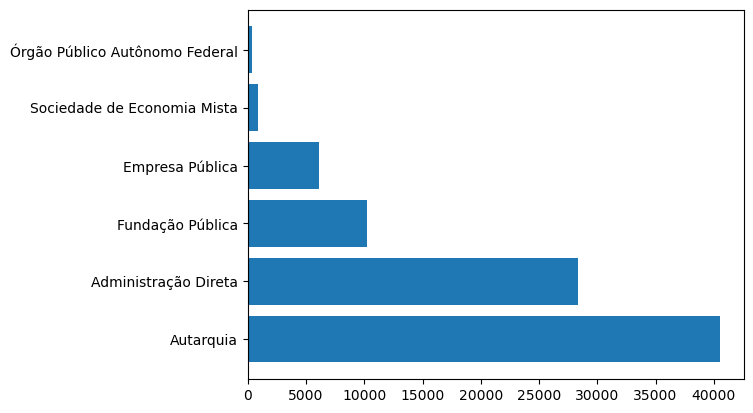

In [43]:
pp.barh(qtde_nj.index, qtde_nj.values)